### Preparation to build a code for ANN training

*   Access to your google drive
*   Import tensorflow framework to run deep learning model
*   Allocate GPU

In [ ]:
# Access to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import 'Tensorflow' package
import tensorflow as tf
from tensorflow import keras

# Check the version of tensorflow
print(tf.__version__)

2.15.0


In [ ]:
# Check if a GPU(in Google server) is allocated
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')

print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


## Step 5-1: ANN
We've extracted the features of the classified data in ML8_1.

We'll train ANN model using those feature data.

Prepare the selected features data

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load selected feature data and P-values at Step 4-1 in ML8_1
feature_path = "YOUR_PATH/FeatureSelected.csv"
p_rank_path = 'YOUR_PATH/P_value_Rank.csv'

FeatureSelected = pd.read_csv(feature_path, header=None)
P_value_Rank = pd.read_csv(p_rank_path , header=None)

# Standardize the selected features
FeatureSelected_std = StandardScaler().fit_transform(pd.DataFrame(FeatureSelected).T)
FeatureSelected_std.shape

(623, 30)

In [ ]:
# Split feature data into 6 classes back
num_class=6
num_data=[96, 161, 144, 41, 34, 147] # 1 segment per 1 second with 0.8 second overlap

# Calculate the index
d_index = [sum(num_data[:i+1]) for i in range(len(num_data))]

# Index feature data
first = True
for i in range(num_class):
  if first:
    exec(f"class{i+1}_set = FeatureSelected_std[:d_index[{i}]]")
    first = False
  else:
    exec(f"class{i+1}_set = FeatureSelected_std[d_index[{i-1}]:d_index[{i}]]")
  exec(f"print('class', {i+1}, class{i+1}_set.shape)")

class 1 (96, 30)
class 2 (161, 30)
class 3 (144, 30)
class 4 (41, 30)
class 5 (34, 30)
class 6 (147, 30)


Split dataset into training and test sets

In [ ]:
### How to handle iterative codes
TRAIN_DATA_CLASS1, TEST_DATA_CLASS1 = train_test_split(DATA_CLASS1, test_size=test_ratio, random_state=777)
TRAIN_DATA_CLASS2, TEST_DATA_CLASS2 = train_test_split(DATA_CLASS2, test_size=test_ratio, random_state=777)
TRAIN_DATA_CLASS3, TEST_DATA_CLASS3 = train_test_split(DATA_CLASS3, test_size=test_ratio, random_state=777)
TRAIN_DATA_CLASS4, TEST_DATA_CLASS4 = train_test_split(DATA_CLASS4, test_size=test_ratio, random_state=777)
TRAIN_DATA_CLASS5, TEST_DATA_CLASS5 = train_test_split(DATA_CLASS5, test_size=test_ratio, random_state=777)
TRAIN_DATA_CLASS6, TEST_DATA_CLASS6 = train_test_split(DATA_CLASS6, test_size=test_ratio, random_state=777)

### You can make these as a 'for' loop
for i in range(num_class): # i starts from '0' and ends with 'num_class-0'
  exec(f"TRAIN_DATA_CLASS{i+1}, TEST_DATA_CLASS{i+1} = train_test_split(DATA_CLASS{i+1}, test_size=test_ratio, random_state=777)")

In [ ]:
from sklearn.model_selection import train_test_split

# Define the test data ratio
test_ratio = 0.2

# Split the datasets into training and test sets
for i in range(num_class):
  exec(f"train_class{i+1}, test_class{i+1} = train_test_split(class{i+1}_set, test_size=test_ratio, random_state=777)")

  exec(f"print('- class', {i+1},'train data', train_class{i+1}.shape, 'test data',test_class{i+1}.shape)")
print("\n")

# Make label data (One-hot Encoding)
for i in range(num_class):
  exec(f"TrainLabel_class{i+1}=np.zeros((train_class{i+1}.shape[0],num_class))")
  exec(f"TestLabel_class{i+1}=np.zeros((test_class{i+1}.shape[0],num_class))")

  exec(f"TrainLabel_class{i+1}[:,{i}]=1")
  exec(f"TestLabel_class{i+1}[:,{i}]=1")

  exec(f"print('- class', {i+1},'train label',TrainLabel_class{i+1}.shape, 'test label', TestLabel_class{i+1}.shape)")
print("\n")

# Combine the classified data/labels
TrainData = np.concatenate([train_class1, train_class2, train_class3, train_class4, train_class5, train_class6], axis=0)
TestData = np.concatenate([test_class1, test_class2, test_class3, test_class4, test_class5, test_class6], axis=0)
TrainLabel = np.concatenate([TrainLabel_class1, TrainLabel_class2, TrainLabel_class3, TrainLabel_class4, TrainLabel_class5, TrainLabel_class6], axis=0)
TestLabel = np.concatenate([TestLabel_class1, TestLabel_class2, TestLabel_class3, TestLabel_class4, TestLabel_class5, TestLabel_class6], axis=0)

print("- total train data", TrainData.shape,  ", test data", TestData.shape)
print("- total train label", TrainLabel.shape, ", test label",TestLabel.shape)

- class 1 train data (76, 30) test data (20, 30)
- class 2 train data (128, 30) test data (33, 30)
- class 3 train data (115, 30) test data (29, 30)
- class 4 train data (32, 30) test data (9, 30)
- class 5 train data (27, 30) test data (7, 30)
- class 6 train data (117, 30) test data (30, 30)


- class 1 train label (76, 6) test label (20, 6)
- class 2 train label (128, 6) test label (33, 6)
- class 3 train label (115, 6) test label (29, 6)
- class 4 train label (32, 6) test label (9, 6)
- class 5 train label (27, 6) test label (7, 6)
- class 6 train label (117, 6) test label (30, 6)


- total train data (495, 30) , test data (128, 30)
- total train label (495, 6) , test label (128, 6)


Prepare lists of hyperparameters for grid search

In [ ]:
# Set hyperparameters for grid search
activation_function = ['tanh', 'relu'] # activation function
hidden_layer = [2, 3] # number of hiddent layers
learning_rate = [0.001, 0.01] # learning rate

# Set hyperparameters for each training
num_neuron = 16
epoch = 300

# Calculate the number of cases
num_case = len(activation_function) * len(hidden_layer) * len(learning_rate)
print("We're gonna run", num_case, "models")

We're gonna run 8 models


In [ ]:
# Define a function to create ANN models by inputting the hyperparameters for grid search

def ANN_model(input_data, num_neuron, temp_actfn, temp_layer, temp_lr):
    keras.backend.clear_session()  # Clearing the Keras backend session (initiating variables)

    model = keras.Sequential()
    model.add(keras.layers.InputLayer(input_shape=(input_data.shape[1],)))  # Input Layer

    for i in range(temp_layer):
        model.add(keras.layers.Dense(units=num_neuron, activation=temp_actfn, name=f'Hidden{i+1}'))  # Hidden Layer

    model.add(keras.layers.Dense(units=6, activation='softmax', name='Output'))  # Output Layer

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=temp_lr),
                  loss=keras.losses.CategoricalCrossentropy(),
                  metrics=['accuracy'])
    return model

In [ ]:
# Create an empty dataframe to store the accuracy results
Accuracy_df = pd.DataFrame(np.zeros(shape=(num_case, 4)), columns=['Activation Function', 'Num of hidden layer', 'Learning rate', 'Accuracy'])

Train the ANN models with different combinations of hyperparameters and save them

In [ ]:
# Initialize a count value to store the performance of each model
cnt = 0

# Iterate through all possible combinations of activation functions, hidden layers, and learning rates
for act_func in activation_function: # Select each activation function in the list
    for layer in hidden_layer: # Select each hidden layer configuration in the list
        for lr in learning_rate: # Select each learning rate value in the list

            # Create, train, and validate a temporary ANN model with the current combination of hyperparameters
            temp_ann_model = ANN_model(TrainData, num_neuron, act_func, layer, lr)
            temp_ann_model.fit(TrainData, TrainLabel, epochs=epoch, verbose=0)
            Loss, Accuracy = temp_ann_model.evaluate(TestData,  TestLabel, verbose=0)

            # Save the temporary model to a file with a corresponding name
            temp_ann_model_name = f'ANN_{act_func}_L{layer}_LR{lr:.4f}.h5'
            temp_ann_model.save('YOUR_PATH/GridSearch_ANN/' + temp_ann_model_name)

            # Store the performance (accuracy) of the temporary model in the dataframe
            Accuracy_df.iloc[cnt, :] = [act_func, layer, lr, Accuracy]
            cnt += 1

# Display the resulting dataframe with model performances
Accuracy_df

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


,Activation Function,Num of hidden layer,Learning rate,Accuracy
0,tanh,2.0,0.001,0.945312
1,tanh,2.0,0.010,0.929688
2,tanh,3.0,0.001,0.945312
3,tanh,3.0,0.010,0.945312
4,relu,2.0,0.001,0.929688
5,relu,2.0,0.010,0.914062
6,relu,3.0,0.001,0.921875
7,relu,3.0,0.010,0.929688


Confirm the grid search results

In [ ]:
# Calculate mean and standard deviation accuracy for each activation function
mean_accuracy_actfn = Accuracy_df.groupby(['Activation Function'])['Accuracy'].agg(['mean', 'std']).reset_index()

# Calculate mean and standard deviation of accuracy for each hidden layer
mean_accuracy_layer = Accuracy_df.groupby(['Num of hidden layer'])['Accuracy'].agg(['mean', 'std']).reset_index()

# Calculate mean and standard deviation of accuracy for each learning rate
mean_accuracy_lr = Accuracy_df.groupby(['Learning rate'])['Accuracy'].agg(['mean', 'std']).reset_index()

print("Mean accuarcy\n", mean_accuracy_actfn,"\n\n", mean_accuracy_layer, "\n\n",mean_accuracy_lr)

Mean accuarcy for activation
   Activation Function      mean       std
0                relu  0.923828  0.007480
1                tanh  0.941406  0.007813 

    Num of hidden layer      mean       std
0                  2.0  0.929688  0.012758
1                  3.0  0.935547  0.011719 

    Learning rate      mean       std
0          0.001  0.935547  0.011719
1          0.010  0.929688  0.012758


Visualize the performance comparison for the selected hyperparameter

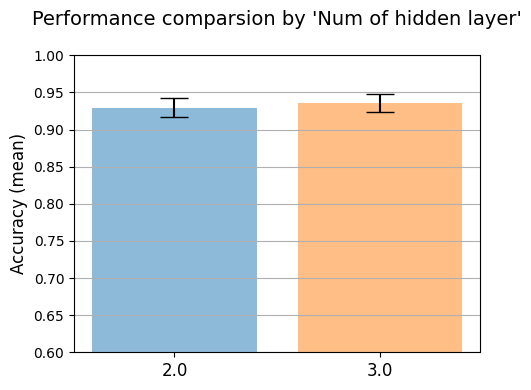

In [ ]:
# Set an index to select a hyperparmeter
# 0: activation function // 1: number of hidden layers // 2: learning rate
idx = 1

# Automatically define variables based on the selected index
hyper_param = ['actfn', 'layer', 'lr']
hyper_param_name = ['Activation Function', 'Num of hidden layer', 'Learning Rate']
selected = hyper_param[idx]
selected_name = hyper_param_name[idx]
exec('Result = mean_accuracy_' + hyper_param[idx])

xLabel = Result.iloc[:, 0]
x_pos = np.arange(Result.shape[0])
y_val = Result['mean']
y_err = Result['std']

# Draw a bar chart to compare the model performance (diagnostic accuracy) for each hyperparameter
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 4))

# Create a bar plot with error bars
ax.bar(x_pos, y_val, yerr=y_err, align='center', alpha=0.5, ecolor='black', capsize=10,
       color=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple'])
ax.set_ylabel('Accuracy (mean)', fontsize=12)
ax.set_title(f"Performance comparsion by '{selected_name}'\n", fontsize=14)
ax.set_xticks(x_pos)
ax.set_xticklabels(xLabel, fontsize=12)
ax.yaxis.grid()
ax.set_ylim([0.6, 1.0])

plt.tight_layout()
plt.show()

Select the best model among 8 cases

In [ ]:
# Sort the Accuracy_df by 'Accuracy' column in descending order
Accuracy_df_sorted = Accuracy_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

# Retrieve activation function, hidden layers, and learning rate values from the first row of 'Accuracy_df_sorted'
best_actfn = Accuracy_df_sorted.iloc[0, 0]
best_layer = int(Accuracy_df_sorted.iloc[0, 1])
best_lr = Accuracy_df_sorted.iloc[0, 2]
best_accuracy = Accuracy_df_sorted.iloc[0, 3]

# Output the best case
print("[Best case]\nActivation Function: " + best_actfn +
      "\nHidden Layers: %d\nLearning Rate: %.4f\n\nAccuracy: %.2f" % (best_layer, best_lr, best_accuracy))

[Best case]
Activation Function: tanh
Hidden Layers: 2
Learning Rate: 0.0010

Accuracy: 0.95


In [ ]:
# Load the best ANN model using the retrieved hyperparameters
best_ann_model_name = f'ANN_{best_actfn}_L{best_layer}_LR{best_lr:.4f}.h5'
best_ann_model = keras.models.load_model('YOUR_PATH/GridSearch_ANN/' + best_ann_model_name)

In [ ]:
# Print layers in the model
best_ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden1 (Dense)             (None, 16)                496       
                                                                 
 Hidden2 (Dense)             (None, 16)                272       
                                                                 
 Output (Dense)              (None, 6)                 102       
                                                                 
Total params: 870 (3.40 KB)
Trainable params: 870 (3.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


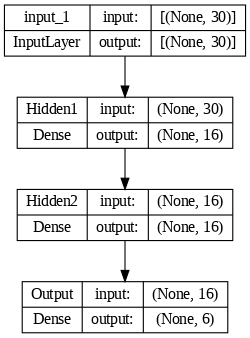

In [ ]:
# Plot model architecture
keras.utils.plot_model(best_ann_model, dpi=80, show_shapes=True) # dpi: image resolution in dots per inch

[Confusion matrix] for the best ANN model

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict the output (Robotic spot-welding condition) for the test data
Predicted = best_ann_model.predict(TestData)

# Convert TestLabel and Predicted into vectors to calculate the confusion matrix and evaluation metrics
TestLabel_rev = np.argmax(TestLabel, axis=1)
Predicted_rev = np.argmax(Predicted, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(TestLabel_rev, Predicted_rev)

4/4 [==============================] - 0s 2ms/step


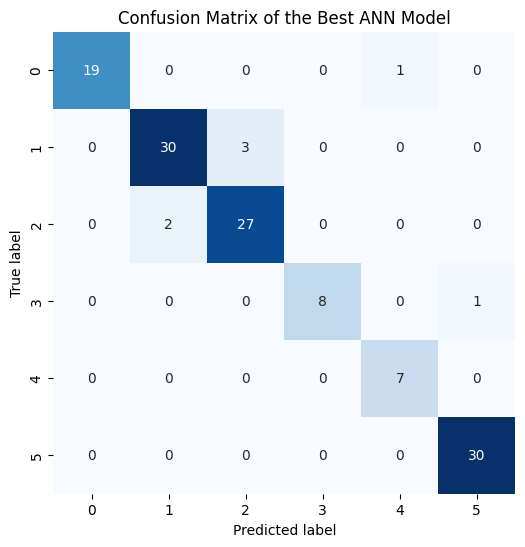

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False, square=True)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix of the Best ANN Model")
plt.show()

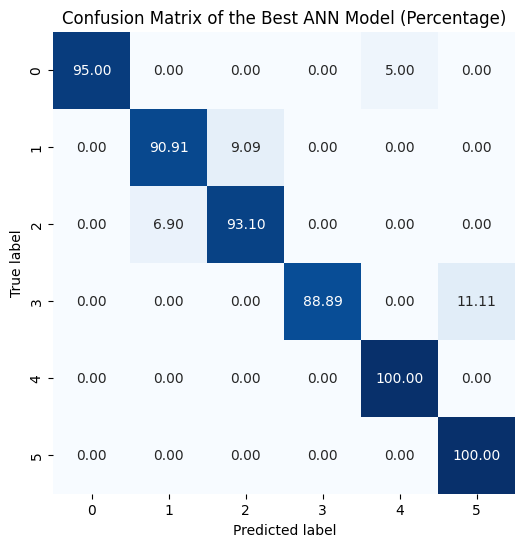

In [ ]:
# Normalize confusion matrix to show percentages
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(6, 6))
sns.heatmap(cm_percent, annot=True, fmt='.2f', cmap=plt.cm.Blues, cbar=False, square=True)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix of the Best ANN Model (Percentage)")
plt.show()